In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A review of important LINEAR ALGEBRA topics

# This notebook is based off of:

## Applied Linear Algebra Refresher Course
## by Karianne Bergen kbergen@stanford.edu
## Institute for Computational and Mathematical Engineering, Stanford University
## September 16-19, 2013

In [2]:
# Examples of variable types

scalar = 4
vector1 = np.array([2,8,4,6])
vector2 = np.array([9,3,7,5])
matrix1 = np.matrix([[1,9,6],
                    [8,2,4],
                    [7,5,1]])
matrix2 = np.matrix([[5,3,8],
                    [5,3,9],
                    [4,6,0]])

In [3]:
# Scalar Multiplication

scalar * vector1

array([ 8, 32, 16, 24])

In [4]:
# Vector addition/subtraction

print(vector1 + vector2)

print(vector1 - vector2)

[11 11 11 11]
[-7  5 -3  1]


In [5]:
# Inner product (dot product or scalar product)

vector1.dot(vector2)

100

In [6]:
# 3 Vector norm properties
# 1. They are scale invariant

# According to Wikipedia:
# scale invariance is a feature of objects or laws 
# that do not change if scales of length, energy, 
# or other variables, are multiplied by a common factor, 
# thus represent a universality

# Vector norms give us a way to measure how 'big' a vector is

# The choice of norm is application specific

( scalar * np.linalg.norm(vector1) )==( np.linalg.norm(vector1*scalar) )

True

In [7]:
# 2. Vector norms satisfy the Triangle inequality
# Norm(vector1 + vector2) <= Norm(vector1) + Norm(vector2)
# Note, Norm here is 2-norm
print(np.linalg.norm(vector1 + vector2) <= np.linalg.norm(vector1) + np.linalg.norm(vector2))

# Another example 
vector2D_1 = np.array([4,2])
vector2D_2 = np.array([3,1])
print(np.linalg.norm(vector2D_1 + vector2D_2) <= np.linalg.norm(vector2D_1) + np.linalg.norm(vector2D_2))

True
True


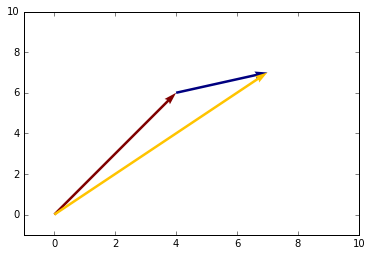

Where, 
	vector 1 (red) norm = 7.21
	vector 2 (blue) norm = 7.87
	Their addition norm = 9.90

Thus, Norm(vector1 + vector2) [9.90] <= Norm(vector1) + Norm(vector2) [15.09]


In [8]:
# In graphical form that looks like this:
vector2D_1 = np.array([0,0,4,6])
vector2D_2 = np.array([4,6,3,1])
vector_addition = np.array([0,0,7,7])
all_vectors = [vector2D_1, vector2D_2, vector_addition]
X, Y, U, V = zip(*all_vectors)

plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1, color='g')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
plt.close()

print("Where, \n\tvector 1 (red) norm = {0:.2f}\n\tvector 2 (blue) norm = {1:.2f}\n\tTheir addition norm = {2:.2f}".format(
        np.linalg.norm(vector2D_1),
        np.linalg.norm(vector2D_2),
        np.linalg.norm(vector_addition))
    )
print("\nThus, Norm(vector1 + vector2) [{0:.2f}] <= Norm(vector1) + Norm(vector2) [{1:.2f}]".format(
    np.linalg.norm(vector_addition),
    np.linalg.norm(vector2D_1) + np.linalg.norm(vector2D_2)
))

In [9]:
# 3. Vector norm satisfies positivity

vector3 = np.array([0,0,0])
all(vector3 == np.linalg.norm(vector3))

True

In [10]:
# Type of vector norms

print("Vector =", vector1)

# 1-norm
print("\n1-norm")
print("\t", sum(vector1))

# 2-norm (Euclidean)
print("\n2-norm (Euclidean)")
print("\t", np.linalg.norm(vector1))

# Infinity-norm (Euclidean)
print("\nInfinity-norm")
print("\t", np.linalg.norm(vector1, ord=np.Inf))

Vector = [2 8 4 6]

1-norm
	 20

2-norm (Euclidean)
	 10.9544511501

Infinity-norm
	 8


### All of which are specific examples of the general p-norm
# $||v||_p = (\sum\limits_{i=1}^{n} |v_i|^p)^{1/p}   , p \ge 1$

---------------------------------------

## The inner product (dot product) satisfies the Cauchy-Schwartz inequality
# $|x^T y| ≤ ||x||_2 · ||y||_2 $   for    $ x, y ∈ \mathbb{R}^n$

In [11]:
# This is equal when vector 'y' is a scalar multiple of x, otherwise it is less than

abs(vector1.dot(vector1*4))== np.linalg.norm(vector1) * np.linalg.norm(vector1*4)

True

In [12]:
# Inner product (dot product) and Orthogonality

# 1. Orthogonal vectors have an inner product of zero
vector4 = np.array([0,2])
vector5 = np.array([4,0])

vector4.dot(vector5)

0

In [13]:
# 2. Orthogonal vectors are orthonormal if both are normalized to length 1

print("Orthogonal vectors:")
print("\tVector 4 =", vector4)
print("\tVector 5 =", vector5)

vector4 = vector4/np.linalg.norm(vector4)
vector5 = vector5/np.linalg.norm(vector5)
print("\nOrthonormal vectors:")
print("\tVector 4 =", vector4)
print("\tVector 5 =", vector5)

print("\nVector Norm:")
print("\tVector 4 =", np.linalg.norm(vector4))
print("\tVector 5 =", np.linalg.norm(vector5))

Orthogonal vectors:
	Vector 4 = [0 2]
	Vector 5 = [4 0]

Orthonormal vectors:
	Vector 4 = [ 0.  1.]
	Vector 5 = [ 1.  0.]

Vector Norm:
	Vector 4 = 1.0
	Vector 5 = 1.0


## 3. The orthogonal complement of a set of vectors $V$ , 
## denoted $V^⊥$, is the set of vectors $x$ such that $x^T v = 0, ∀v ∈ V$ .

---------------------------------------

## The Inner Product (dot product) and Projections
### The projection of $v$ onto $u$ 
# = $\frac{u^Tv}{||u||} * \frac{u}{||u||}$

### If $u$ is normalized to unit length, $||u|| = 1$, this becomes:
# = $(u^Tv)u$

In [14]:
# Scalar matrix multiplication

print("Original matrix:")
print(matrix1)

print("\nAfter scalar mult. by 4:")
print(matrix1 * scalar)

Original matrix:
[[1 9 6]
 [8 2 4]
 [7 5 1]]

After scalar mult. by 4:
[[ 4 36 24]
 [32  8 16]
 [28 20  4]]


In [15]:
# Matrix addition

print("Matrix 1")
print(matrix1)
print("\nMatrix 2")
print(matrix2)
print("\nMatrix 1 + Matrix 2")
print(matrix1+matrix2)

Matrix 1
[[1 9 6]
 [8 2 4]
 [7 5 1]]

Matrix 2
[[5 3 8]
 [5 3 9]
 [4 6 0]]

Matrix 1 + Matrix 2
[[ 6 12 14]
 [13  5 13]
 [11 11  1]]


In [16]:
# Matrix-vector multiplication
vector6 = np.array([1,2,3])
print("Note, the shapes of the vectors and/or matrices is important.")
print("They must match (AxB)*(BxC):\n\t(2x3)*(3x4)\n\t(5x2)*(2x1)")

print("\nMatrix 1 (3x3)")
print(matrix1)
print("\nVector 6 (1x3)")
print(vector6)
print("\nVector 6 * Matrix 1 (1x3)")
print(vector6 * matrix1)

Note, the shapes of the vectors and/or matrices is important.
They must match (AxB)*(BxC):
	(2x3)*(3x4)
	(5x2)*(2x1)

Matrix 1 (3x3)
[[1 9 6]
 [8 2 4]
 [7 5 1]]

Vector 6 (1x3)
[1 2 3]

Vector 6 * Matrix 1 (1x3)
[[38 28 17]]


## Properties of Matrix-Matrix Multiplication
### 1. Associative
# $A(BC) = (AB)C$

### 2. Distributive
# $A(B+C) = AB + AC$

### 3. NOT commutative
# $AB \ne BA$

In [17]:
# The outer product of two vectors
# Useful for performing transform operations and calculating covariance or auto-covariance matrices
print("Vector 1")
print(vector1)

print("\nVector 2")
[print(i) for i in vector2]

print("\nOuter product:")
print(np.outer(vector1, vector2))

Vector 1
[2 8 4 6]

Vector 2
9
3
7
5

Outer product:
[[18  6 14 10]
 [72 24 56 40]
 [36 12 28 20]
 [54 18 42 30]]


In [18]:
# Transpose of a matrix
print("Matrix 1")
print(matrix1)

print("\nMatrix 1 transposed")
print(matrix1.transpose())

Matrix 1
[[1 9 6]
 [8 2 4]
 [7 5 1]]

Matrix 1 transposed
[[1 8 7]
 [9 2 5]
 [6 4 1]]


In [19]:
# Trace of a matrix
print("Matrix 1")
print(matrix1)

print("Matrix 1 trace")
print(matrix1.trace())

Matrix 1
[[1 9 6]
 [8 2 4]
 [7 5 1]]
Matrix 1 trace
[[4]]


In [20]:
# Matrix Norms

# Matrix norms are just an extension of vector norms to matrices

print("Matrix 1")
print(matrix1)

# 1. Induced norm (operator norm)
print("\nMatrix 1 induced norm ||A||1")
print(np.linalg.norm(matrix1, ord=1))

print("\nMatrix 1 induced norm ||A||2 a.k.a. spectral norm")
print(np.linalg.norm(matrix1, ord=2))

print("\nMatrix 1 induced norm ||A||inf")
print(np.linalg.norm(matrix1, ord=np.inf))

# 2. Frobenius norm
print("\nMatrix 1 Frobenius norm")
print(np.linalg.norm(matrix1,ord='fro'))

Matrix 1
[[1 9 6]
 [8 2 4]
 [7 5 1]]

Matrix 1 induced norm ||A||1
16

Matrix 1 induced norm ||A||2 a.k.a. spectral norm
14.5507659955

Matrix 1 induced norm ||A||inf
16

Matrix 1 Frobenius norm
16.6433169771


## Geometric Interpretation of Matrix Norms
### Image from Trefethen and Bau's Numerical Linear Algebra

!["Matrix Norms"](matrix_norms.png)

# Properties of Matrix Norms

## Same as for matrix 
1. Scale invariance
2. Triangle inequality
3. Positivity

### Some also satisfy the submultiplicative property
# $||Ax|| \le$ $||A||$ $||x||$ , and $||AB|| \le$ $||A||$ $||B||$

In [21]:
# Special Types of Matrices

print("Diagonal Matrix")
print(np.diag(vector1))

print("\nIdentity Matrix")
print(np.identity(4))

print("\nTriangular Matrix")
print("\tLower")
print(np.tril(matrix1))
print("\n\tUpper")
print(np.triu(matrix1))

Diagonal Matrix
[[2 0 0 0]
 [0 8 0 0]
 [0 0 4 0]
 [0 0 0 6]]

Identity Matrix
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Triangular Matrix
	Lower
[[1 0 0]
 [8 2 0]
 [7 5 1]]

	Upper
[[1 9 6]
 [0 2 4]
 [0 0 1]]


In [22]:
# Some Interesting results concerning addition/subtraction and transpose
print("The addition of two upper triangles is an upper triangle (same for subtraction)")
print(np.triu(matrix1) + np.triu(matrix1))

print("\nTranpose upper triangle to get lower")
print(np.triu(matrix1).transpose())

The addition of two upper triangles is an upper triangle (same for subtraction)
[[ 2 18 12]
 [ 0  4  8]
 [ 0  0  2]]

Tranpose upper triangle to get lower
[[1 0 0]
 [9 2 0]
 [6 4 1]]


In [23]:
# More Matrices
matrix3 = np.matrix([[1,3,5],
           [3,7,4],
           [5,4,9]])

print("Symmetric Matrix")
print(matrix3)
print("\nAnd its transpose")
print(matrix3.transpose())

Symmetric Matrix
[[1 3 5]
 [3 7 4]
 [5 4 9]]

And its transpose
[[1 3 5]
 [3 7 4]
 [5 4 9]]


In [24]:
# Orthogonal matrices (Unitary matrices)
matrix4 = np.matrix([[0,1,0],
                     [1,0,0],
                     [0,0,1]])

print("Matrix is orthogonal if inner product with itself is the identity matrix\n")
print(matrix4.dot(matrix4.transpose()))
print("\nwhich it is")

Matrix is orthogonal if inner product with itself is the identity matrix

[[1 0 0]
 [0 1 0]
 [0 0 1]]

which it is


---------------------------------------

## Linear Transformations

# $\mathbb{R}^n \rightarrow \mathbb{R}^m$
### is a linear transformation if for all x, y ∈ Rn the following properties hold:

## 1. $T(x+y)=T(x)+T(y)$

## 2. $T(\alpha x) = \alpha T(x)$

---------------------------------------

# Linear Combinations

## Let $v1, v2, ···, vr ∈ \mathbb{R}^m$ be a set of vectors

## Then any vector $v$ which can be written in the form
# $v = \alpha_1 v_1 + \alpha_2 v_2 + ··· + \alpha_r v_r, \alpha_i ∈ \mathbb i=1,...,r$ 
## is a linear combination of vectors $v_1, v_2, ... , v_r$.

In [25]:
# Examples
v = np.array([7,4,3])

# v is also a linear combination as shown below
all(v == 7 * np.array([1,0,0]) + 4 * np.array([0,1,0]) + 3 * np.array([0,0,1]))

True

* * *

## Span: the set of all linear combination of vectors $v_1, · · · , v_r ∈ \mathbb{R}^m$ is called the span of ${v_1,··· ,v_r}$

## span{$v_1, ... , v_r$}, is always a subspace of $\mathbb{R}^m$.

## If S = span{$v_1,··· ,v_r$}, then S is spanned by $v_1, v_2, ···, v_r$.

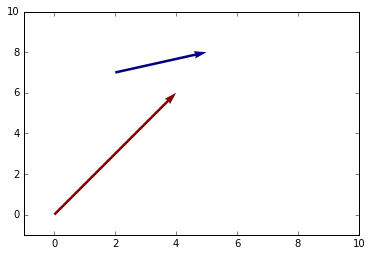

In [26]:
vector2D_1 = np.array([0,0,4,6])
vector2D_2 = np.array([2,7,3,1])

all_vectors = [vector2D_1, vector2D_2]
X, Y, U, V = zip(*all_vectors)

plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1, color='g')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
plt.close()

## Above, both vectors $v_1$ and $v_2 \in \mathbb{R}^2$ and the 
## set of all linear combinations of these two vectors are a subset of $\mathbb{R}^2$

* * *

## A set S is called a subspace if it is closed under vector addition and scalar multiplication:
# if $x, y \in S$ and $\alpha \in \mathbb{R}$, then $x + y \in S$ and $\alpha x \in S$

* * *

## Linear dependence: a set of vectors $v_1, v_2, ... , v_r$ is linearly dependent 
## if there exists a set of scalars $\alpha_1, \alpha_2, ... , \alpha_r \in \mathbb{R}$ with at least one $\alpha_i \ne$ 0 such that
## $\alpha_1 v_1 + \alpha_2 v_2 + ··· + \alpha_r v_r = 0$
## That is, a set of vectors is linearly dependent if one of the vectors in the set can be written as a linear combination of one or more other vectors in the set.

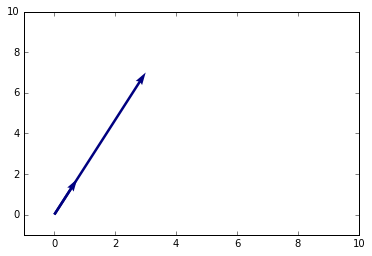

In [27]:
vector2D_1 = np.array([0,0,3/4,7/4])
vector2D_2 = np.array([0,0,3,7])

all_vectors = [vector2D_1, vector2D_2]
X, Y, U, V = zip(*all_vectors)

plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1, color='g')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
plt.close()

In [28]:
print("The above vectors are linearly dependent since -4*vector2D_1 + 1*vector2D_2 == 0")
print(all(-4*vector2D_1 + 1*vector2D_2 == 0))

print("This matches the form α1v1 + α2v2 = 0, where a1 is -4 and a2 is 1")

The above vectors are linearly dependent since -4*vector2D_1 + 1*vector2D_2 == 0
True
This matches the form α1v1 + α2v2 = 0, where a1 is -4 and a2 is 1


## Linear independence: a set of vectors $v_1, v_2, ... , v_r$ is linearly independent if it is not linearly dependent. That is
## $\alpha_1 v_1 + \alpha_2 v_2 + ··· + \alpha_r v_r = 0 \Leftrightarrow \alpha_1 = ··· = \alpha_r = 0$

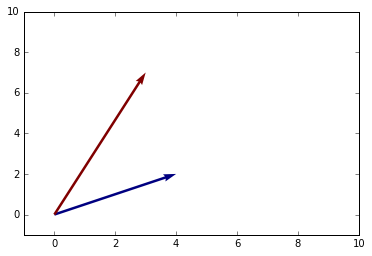

In [29]:
vector2D_1 = np.array([0,0,4,2])
vector2D_2 = np.array([0,0,3,7])

all_vectors = [vector2D_1, vector2D_2]
X, Y, U, V = zip(*all_vectors)

plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1, color='g')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
plt.close()

## A basis for a subspace $S$ is a linearly independent set of vectors that span $S$

* The basis for a subspace $S$ is not unique, but all bases for the subspace contain the same number of vectors.

* For example, consider the case where $S = \mathbb{R}^2$:

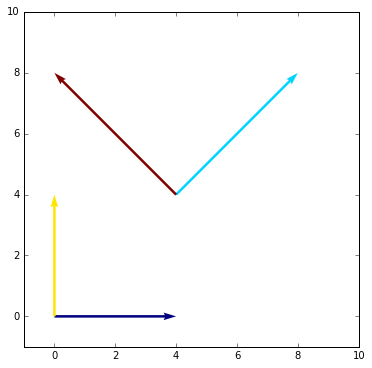

In [30]:
vector2D_1 = np.array([0,0,4,0])
vector2D_2 = np.array([0,0,0,4])
vector2D_3 = np.array([4,4,4,4])
vector2D_4 = np.array([4,4,-4,4])

all_vectors = [vector2D_1, vector2D_2, vector2D_3, vector2D_4]
X, Y, U, V = zip(*all_vectors)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1, color='g')
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
plt.close()

### The dimension of the subspace $S$, dim($S$), is the number of linearly independent vectors in the basis for $S$ (in the example above, dim($S$) = 2).

### Theorem (unique representation): if vectors $v_1, ..., v_n$ are a basis for subspace $S$, then every vector in $S$ can be uniquely represented as a linear combination of these basis vectors.

### This makes intuitive sense if you think about the basis centered at 0,0. All vectors in $\mathbb{R}^2$ are described relative to the x- and y-axes just as every vector could be described as a linear combination of this basis.

* * *

### The range (column space, image) of a matrix $A \in \mathbb{R}^{m \times n}$, denoted by $R(A)$, is the set of all linear combinations of the columns of $A$:
## $R(A):= \{ Ax|x \subseteq \mathbb{R}^n \}, R(A) \subseteq \mathbb{R}^m$
    
### The nullspace (kernel) of a matrix $A \in \mathbb{R}^{m \times n}$, denoted by $N(A)$, is the set of vectors $z$ such that $Az = 0: N(A) := \{ z \in \mathbb{R}^n | Az = 0 \}, N(A) \in \mathbb{R}^n$

### The range and nullspace of $A^T$ are called the row space and left nullspace of $A$.

### These four subspaces of $A$ are intrinsic to $A$ and do not depend on the choice of basis.
* * *

# Rank

### Let $A$ be an m-by-n matrix. Then

* rank($A$) = dim(rowspace($A$)) = dim(colspace($A$)),
* rank($A$) = number of pivots in any echelon form of $A$,
* rank($A$) = the maximum number of linearly independent rows or columns of $A$.
* Matrix $A \in \mathbb{R}^m \times n$ is full rank if rank($A$) = min{m, n}.


In [31]:
print(matrix1)
print("rank: ", np.linalg.matrix_rank(matrix1))

print(matrix2)
print("rank: ", np.linalg.matrix_rank(matrix2))

print(matrix3)
print("rank: ", np.linalg.matrix_rank(matrix3))

print(matrix4)
print("rank: ", np.linalg.matrix_rank(matrix4))

matrix5 = np.matrix([[1,0,0],[0,1,0],[0,0,0]])
print(matrix5)
print("rank: ", np.linalg.matrix_rank(matrix5))

[[1 9 6]
 [8 2 4]
 [7 5 1]]
rank:  3
[[5 3 8]
 [5 3 9]
 [4 6 0]]
rank:  3
[[1 3 5]
 [3 7 4]
 [5 4 9]]
rank:  3
[[0 1 0]
 [1 0 0]
 [0 0 1]]
rank:  3
[[1 0 0]
 [0 1 0]
 [0 0 0]]
rank:  2


## Fundamental theorem of linear algebra:

* The nullspace of $A$ is the orthogonal complement of the row space.
$N (A) = (R(A^T))^⊥$
* The left nullspace of $A$ is the orthogonal complement of the column
space.
$N (A^T ) = (R(A))^⊥$

In [53]:
from sympy import Matrix

A = Matrix([[2, 3, 5], [-4, 2, 3], [0, 0, 0]])
nullspace = A.nullspace()

print("The nullspace is:")
print(nullspace)

print("\nVerify nullspace:")
print(A * A.nullspace()[0])

print("\nThe left nullspace is:")
print(A.transpose().nullspace())


The nullspace is:
[Matrix([
[-1/16],
[-13/8],
[    1]])]

Verify nullspace:
Matrix([[0], [0], [0]])

The left nullspace is:
[Matrix([
[0],
[0],
[1]])]


## Corollary (Rank-nullity):
## $dim(R(A))+dim(N(A))=n, A\in \mathbb{R}^{m\times n}$